<a href="https://colab.research.google.com/github/Murad042/Image-classification-using-CNN-CIFAR10-dataset-/blob/main/Image%20classification%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [21]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [28]:
y_train=y_train.reshape(-1)

In [29]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [30]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']



In [31]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

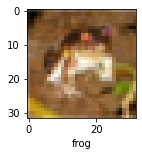

In [32]:
plot_sample(X_train,y_train,0)

In [33]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [35]:
X_train = X_train/255
X_test = X_test/255

In [36]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [41]:

from keras.models import Sequential 
from keras.layers import Activation, Dense, Flatten 
ann = keras.Sequential([
        keras.layers.Flatten(input_shape = (32,32,3)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(1000,activation='relu'),
        keras.layers.Dense(10,activation ='sigmoid')
])

ann.compile(optimizer='SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
ann.fit(X_train,y_train,epochs =5)

Epoch 1/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.9293 - accuracy: 0.3117
Epoch 2/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.6406 - accuracy: 0.4234
Epoch 3/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.5524 - accuracy: 0.4493
Epoch 4/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.4915 - accuracy: 0.4736
Epoch 5/5
1563/1563 [==============================] - 102s 66ms/step - loss: 1.4350 - accuracy: 0.4978


In [42]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.4834 - accuracy: 0.4729


[1.483428955078125, 0.47290000319480896]

In [44]:
 from sklearn.metrics import confusion_matrix,classification_report
 import numpy as np
 y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.60      0.57      1000
           1       0.49      0.74      0.59      1000
           2       0.41      0.27      0.32      1000
           3       0.43      0.14      0.21      1000
           4       0.43      0.41      0.42      1000
           5       0.46      0.33      0.39      1000
           6       0.48      0.62      0.54      1000
           7       0.35      0.78      0.48      1000
           8       0.70      0.51      0.59      1000
           9       0.68      0.33      0.44      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [45]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters = 32,kernel_size =(3,3),activation = 'relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters = 64,kernel_size =(3,3),activation = 'relu'),
        layers.MaxPooling2D((2,2)),
        #dense
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation ='softmax')
])


In [46]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
              

In [47]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.7131 - accuracy: 0.3763
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1573 - accuracy: 0.5943
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0073 - accuracy: 0.6496
Epoch 4/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8984 - accuracy: 0.6873
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8288 - accuracy: 0.7130
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7790 - accuracy: 0.7275
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7252 - accuracy: 0.7475
Epoch 8/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6863 - accuracy: 0.7594
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6384 - accuracy: 0.7746
Epoch 10/10
1563/1563 [==============================] - 60s 38m

In [48]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9506 - accuracy: 0.6899


[0.9505978226661682, 0.6898999810218811]

In [49]:
y_test = y_test.reshape(-1)

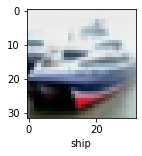

In [50]:
plot_sample(X_test,y_test,1)

In [51]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.1363674e-03, 7.5845946e-06, 1.6016189e-04, 9.6350002e-01,
        1.8850977e-04, 2.3974614e-02, 4.2259241e-03, 4.4621393e-06,
        6.7403992e-03, 6.2013823e-05],
       [4.6674468e-02, 2.9651690e-02, 1.6613765e-06, 1.7630842e-07,
        1.8875623e-06, 5.3771823e-09, 2.4010079e-08, 4.3120529e-08,
        8.8835710e-01, 3.5312921e-02],
       [1.1743658e-01, 1.0155395e-01, 1.4048688e-02, 1.2812103e-02,
        3.5217514e-03, 1.9379858e-03, 4.3344647e-03, 3.3051325e-03,
        6.6243130e-01, 7.8618094e-02],
       [6.7467260e-01, 1.5273920e-02, 4.9947537e-02, 2.7490172e-03,
        2.0791052e-02, 1.3181510e-04, 9.2858257e-04, 3.4364471e-03,
        2.3195599e-01, 1.1306810e-04],
       [5.5451102e-07, 1.8455605e-06, 6.8915081e-03, 1.9148738e-03,
        1.6719094e-02, 2.0797475e-05, 9.7442222e-01, 1.9289379e-08,
        2.8738339e-05, 2.7851127e-07]], dtype=float32)

In [54]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [55]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [56]:
print('Classification Report: \n',classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.87      0.77      0.82      1000
           2       0.58      0.59      0.59      1000
           3       0.50      0.48      0.49      1000
           4       0.62      0.61      0.62      1000
           5       0.67      0.53      0.59      1000
           6       0.60      0.89      0.72      1000
           7       0.84      0.69      0.76      1000
           8       0.78      0.80      0.79      1000
           9       0.81      0.77      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

